In [8]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
# Define the API endpoint
url = "https://climate-api.open-meteo.com/v1/climate"

# Define coordinates for major cities in California
coordinates = [
    {"latitude": 34.0522, "longitude": -118.2437, "city": "Los Angeles"},
    {"latitude": 37.7749, "longitude": -122.4194, "city": "San Francisco"},
    {"latitude": 32.7157, "longitude": -117.1611, "city": "San Diego"},
    {"latitude": 36.7783, "longitude": -119.4179, "city": "Fresno"},
    {"latitude": 38.5767, "longitude": -121.4944, "city": "Sacramento"}
]

# Define the time range
current_year = datetime.now().year
years = range(current_year - 10, current_year)

# Initialize a list to hold the data
data_list = []

# Collect data for each location and year
for coord in coordinates:
    for year in years:
        start_date = f"{year}-01-01"
        end_date = f"{year}-12-31"
        params = {
            "latitude": coord["latitude"],
            "longitude": coord["longitude"],
            "start_date": start_date,
            "end_date": end_date,
            "daily": "temperature_2m_max",
            "timezone": "America/Los_Angeles"  # Specify timezone if needed
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            dates = data.get('daily', {}).get('time', [])
            max_temperatures = data.get('daily', {}).get('temperature_2m_max', [])
            for date, temp in zip(dates, max_temperatures):
                data_list.append({
                    "City": coord["city"],
                    "Date": date,
                    "Max Temperature": temp
                })
        else:
            print(f"Request for {coord} in {year} failed with status code {response.status_code}")

# Create a DataFrame from the collected data
df = pd.DataFrame(data_list)

# Print the DataFrame
df


,City,Date,Max Temperature
0,Los Angeles,2014-01-01,17.7
1,Los Angeles,2014-01-02,18.5
2,Los Angeles,2014-01-03,17.2
3,Los Angeles,2014-01-04,16.0
4,Los Angeles,2014-01-05,14.4
...,...,...,...
18255,Sacramento,2023-12-27,7.7
18256,Sacramento,2023-12-28,6.4
18257,Sacramento,2023-12-29,6.4
18258,Sacramento,2023-12-30,8.5


In [4]:
import pandas as pd

# Path to your local CSV file
csv_file_path = 'Output_Data/combined_climate_data.csv'

# Load the CSV into a DataFrame
climate_df = pd.read_csv(csv_file_path)

# Print the DataFrame
climate_df



,City,Date,Max Temperature (F)
0,Los Angeles,2003-01-01,70.88
1,Los Angeles,2003-01-02,68.00
2,Los Angeles,2003-01-03,64.58
3,Los Angeles,2003-01-04,64.40
4,Los Angeles,2003-01-05,62.24
...,...,...,...
36520,Sacramento,2023-12-27,45.86
36521,Sacramento,2023-12-28,43.52
36522,Sacramento,2023-12-29,43.52
36523,Sacramento,2023-12-30,47.30


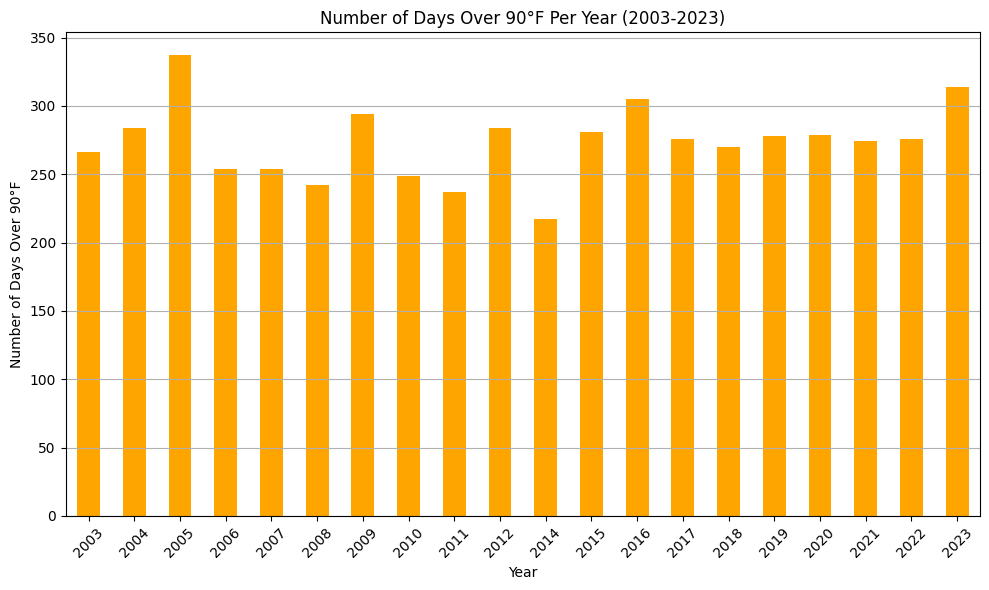

In [15]:
# Convert the 'Date' column to datetime format
climate_df['Date'] = pd.to_datetime(climate_df['Date'])

# Extract the year from the 'Date' column and create a new 'Year' column
climate_df['Year'] = climate_df['Date'].dt.year

# Filter the data for temperatures over 90°F
over_90_df = climate_df[climate_df['Max Temperature (F)'] > 90]

# Count the number of over 90°F days per year
days_over_90_per_year = over_90_df.groupby('Year').size()

# Plot the bar chart
plt.figure(figsize=(10,6))
days_over_90_per_year.plot(kind='bar', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Days Over 90°F')
plt.title('Number of Days Over 90°F Per Year (2003-2023)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()  # Adjusts the layout to prevent label cut-off
plt.savefig('Images/days_over_90_per_year.png')
plt.show()